### SMI Stocks Bullishness Index - ML Model

In [ ]:
############################################################################################################
# Github Copilot was used to assist develop the code below. The generated code was then modified to fit 
# the requirements. No prompt is available, since the autocompletion function was used to generate the code.
############################################################################################################

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pickle
from statsmodels.iolib.smpickle import load_pickle
import requests

In [12]:
url = 'https://github.com/AlGatone21/SMI_Stocks_Bullishness/raw/main/SMI_Weekly_Returns_Complete_v2.xlsx'
df = pd.read_excel(url)

In [3]:
df.tail()

t       Date  weekly.returns  Company   Ticker       Close  \
13382  726 2023-12-01        0.006654  Zuerich  ZURN.SW  438.700012   
13383  727 2023-12-08        0.027126  Zuerich  ZURN.SW  450.600006   
13384  728 2023-12-15       -0.013538  Zuerich  ZURN.SW  444.500000   
13385  729 2023-12-22       -0.008549  Zuerich  ZURN.SW  440.700012   
13386  730 2023-12-29       -0.002496  Zuerich  ZURN.SW  439.600006   

             Open  Sentiment_Score  Sentiment_Score_t1   Volume  Volume_t1  \
13382  435.799988        -0.087719           -0.115385  1443828  1324199.0   
13383  438.700012        -0.045198           -0.087719  1273923  1443828.0   
13384  450.600006        -0.087912           -0.045198  2557448  1273923.0   
13385  444.500000        -0.115741           -0.087912  1237348  2557448.0   
13386  440.700012        -0.021739           -0.115741   449151  1237348.0   

       log_Volume_t1  Volatility  Volatility_t1  Return_t1  
13382      14.096318    0.003349       0.004295  -0.002746  
13383      14.182808    0.003172       0.003349   0.006654  
13384      14.057612    0.005615       0.003172   0.027126  
13385      14.754520    0.001677       0.005615  -0.013538  
13386      14.028481    0.005393       0.001677  -0.008549

In [19]:
# Define the features and target variable
features = df[["Sentiment_Score_t1", "log_Volume_t1", "Volatility_t1", "Return_t1"]]
target = df["weekly.returns"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [23]:
# Create the linear regression model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train)
model = model.fit()

In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         weekly.returns   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     17.31
Date:                Tue, 14 May 2024   Prob (F-statistic):           3.63e-14
Time:                        21:18:11   Log-Likelihood:                 21087.
No. Observations:               10709   AIC:                        -4.216e+04
Df Residuals:                   10704   BIC:                        -4.213e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0052      0

In [25]:
model.predict(X_test)

12180    0.002300
11604    0.001364
12125   -0.002535
624      0.000659
2177     0.004811
           ...   
3571     0.003738
2210     0.000823
578      0.000782
1511     0.006611
12636    0.000824
Length: 2678, dtype: float64

In [ ]:
model.save('linear_regr_model.pickle') # Save the model

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         weekly.returns   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     17.31
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.63e-14
Time:                        15:14:27   Log-Likelihood:                 21087.
No. Observations:               10709   AIC:                        -4.216e+04
Df Residuals:                   10704   BIC:                        -4.213e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0052      0

# ML Classifiers

### KNN

In [3]:
df.head()

t       Date  weekly.returns Company   Ticker      Close       Open  \
0  1 2010-01-08        0.050399     ABB  ABBN.SW  20.193317  19.224422   
1  2 2010-01-15       -0.020903     ABB  ABBN.SW  19.771225  20.193317   
2  3 2010-01-22       -0.065502     ABB  ABBN.SW  18.476168  19.771225   
3  4 2010-01-29        0.009865     ABB  ABBN.SW  18.658434  18.476168   
4  5 2010-02-05       -0.033933     ABB  ABBN.SW  18.025293  18.658434   

   Sentiment_Score  Sentiment_Score_t1    Volume   Volume_t1  log_Volume_t1  \
0              0.0                 0.0  48684113         0.0       0.000000   
1              0.0                 0.0  49711384  48684113.0      17.700863   
2              0.0                 0.0  64567802  49711384.0      17.721745   
3              0.0                 0.0  56457153  64567802.0      17.983226   
4              0.0                 0.0  46271374  56457153.0      17.848993   

   Volatility  Volatility_t1  Return_t1  
0    0.002820       0.000000   0.000000  
1    0.010201       0.002820   0.050399  
2    0.010255       0.010201  -0.020903  
3    0.022751       0.010255  -0.065502  
4    0.018451       0.022751   0.009865

In [81]:
# label the weekly returns into 3 categories
# BUY = 1, HOLD = 0, SELL = 2

df["return_label"] = 0

for i in range(len(df)):
    if df["weekly.returns"][i] > 0.01:
        df["return_label"][i] = 1
    elif df["weekly.returns"][i] < -0.01:
        df["return_label"][i] = 2
    else:
        df["return_label"][i] = 0

df.head()

C:\Users\aless\AppData\Local\Temp\ipykernel_18864\3818770240.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["return_label"][i] = 1
C:\Users\aless\AppData\Local\Temp\ipykernel_18864\3818770240.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["return_label"][i] = 2
C:\Users\aless\AppData\Local\Temp\ipykernel_18864\3818770240.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["return_label"][i] = 2
C:\Users\aless\AppDa

t       Date  weekly.returns Company   Ticker      Close       Open  \
0  1 2010-01-08        0.050399     ABB  ABBN.SW  20.193317  19.224422   
1  2 2010-01-15       -0.020903     ABB  ABBN.SW  19.771225  20.193317   
2  3 2010-01-22       -0.065502     ABB  ABBN.SW  18.476168  19.771225   
3  4 2010-01-29        0.009865     ABB  ABBN.SW  18.658434  18.476168   
4  5 2010-02-05       -0.033933     ABB  ABBN.SW  18.025293  18.658434   

   Sentiment_Score  Sentiment_Score_t1    Volume   Volume_t1  log_Volume_t1  \
0              0.0                 0.0  48684113         0.0       0.000000   
1              0.0                 0.0  49711384  48684113.0      17.700863   
2              0.0                 0.0  64567802  49711384.0      17.721745   
3              0.0                 0.0  56457153  64567802.0      17.983226   
4              0.0                 0.0  46271374  56457153.0      17.848993   

   Volatility  Volatility_t1  Return_t1  knn_prediction  knn_position  \
0    0.002820       0.000000   0.000000               2            -1   
1    0.010201       0.002820   0.050399               1             1   
2    0.010255       0.010201  -0.020903               1             1   
3    0.022751       0.010255  -0.065502               1             1   
4    0.018451       0.022751   0.009865               1             1   

   strategy_returns  return_label  
0         -0.050399             1  
1         -0.020903             2  
2         -0.065502             2  
3          0.009865             0  
4         -0.033933             2

In [5]:
# inspect the distribution of the labels
label_counts = df['return_label'].value_counts()
label_percentages = label_counts / len(df) * 100
label_percentages

return_label
1    38.260999
2    31.739748
0    29.999253
Name: count, dtype: float64

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and target variable
X = df[["Sentiment_Score_t1", "log_Volume_t1", "Volatility_t1", "Return_t1"]]
y = df["return_label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict the return_labels for the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.342419716206124


In [7]:
#optimizing the model using GridSearchCV, searching for the best value of k

from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X, y)

# View the complete results
grid.cv_results_

# Save the model
knn_best = grid.best_estimator_


In [8]:
#inspect the best model accuracy on the test set

# Predict the return_labels for the test set
y_pred = knn_best.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4335324869305452


In [12]:
filename = 'knn.sav'
pickle.dump(knn_best, open(filename, 'wb'))

### SVC

In [12]:
from sklearn.svm import SVC

# Create a SVC object
svc = SVC()

# Train the classifier
svc.fit(X_train, y_train)

# Predict the return_labels for the test set
y_pred = svc.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3764002987303958


In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter values that should be searched
param_grid = {'C': [0.1, 1, 10, 100, 1000], # Regularization parameter
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], # Kernel coefficient
              'kernel': ['rbf']} 

# Instantiate the grid
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Fit the grid with data
grid.fit(X_train, y_train)

# Print best parameter after tuning
print(grid.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# Predict the return_labels for the test set using the best found parameters
grid_predictions = grid.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, grid_predictions)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.384 total time=   4.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.384 total time=   4.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.384 total time=   4.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.384 total time=   4.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.384 total time=   4.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.384 total time=   4.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.384 total time=   4.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.384 total time=   5.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.384 total time=   4.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.384 total time=   4.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.384 total time=   4.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [14]:
# store the best model
svc = grid.best_estimator_

# save the model

filename = 'svc.sav'
pickle.dump(svc, open(filename, 'wb'))

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression object
log_reg = LogisticRegression()

# Train the classifier
log_reg.fit(X_train, y_train)

# Predict the return_labels for the test set
y_pred = log_reg.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.37528005974607914


c:\Users\aless\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# save the model

filename = 'logistic_regression.sav'
pickle.dump(log_reg, open(filename, 'wb'))

### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict the return_labels for the test set
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3618371919342793


In [26]:
# save the model

filename = 'naive_bayes.sav'
pickle.dump(gnb, open(filename, 'wb'))

### Decision Tree Classifier

In [29]:
from sklearn import tree

# Create a Decision Tree classifier object
dt = tree.DecisionTreeClassifier()

# Train the classifier
dt.fit(X_train, y_train)

# Predict the return_labels for the test set
y_pred = dt.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3704256908140403


In [30]:
#save the model

filename = 'decision_tree.sav'
pickle.dump(dt, open(filename, 'wb'))

### XGBOOST

In [8]:
from xgboost import XGBClassifier

# Create a XGBoost classifier object
xgb = XGBClassifier()

# Train the classifier
xgb.fit(X_train, y_train)

# Predict the return_labels for the test set
y_pred = xgb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.41710231516056756


### Backtesting with KNN

In [34]:
# predict the positioning in the market according to the knn model
df["knn_prediction"] = knn_best.predict(df[["Sentiment_Score_t1", "log_Volume_t1", "Volatility_t1", "Return_t1"]])

# Define a function to convert the predictions to positions
def convert_prediction_to_position(prediction):
    if prediction == 2:
        return -1
    elif prediction == 1:
        return 1
    else:
        return 0

# Apply the function to the knn_prediction column
df["knn_position"] = df["knn_prediction"].apply(convert_prediction_to_position)

df.sample(10)

t       Date  weekly.returns   Company   Ticker        Close  \
10639  173 2013-04-26        0.074128   SwissRe  SREN.SW    73.900002   
7416   600 2021-07-02        0.013776     Roche   ROG.SW   349.549988   
8709   433 2018-04-20        0.001364      Sika  SIKA.SW   122.333336   
6828    12 2010-03-26       -0.034659     Roche   ROG.SW   169.899994   
3126   690 2023-03-24        0.009949  Givaudan  GIVN.SW  2944.000000   
781    535 2020-04-03        0.072727     Alcon   ALC.SW    48.380001   
7760   214 2014-02-07        0.027277       SGS  SGSN.SW    84.360001   
575    576 2021-01-15       -0.018699       ABB  ABBN.SW    25.172098   
8732   456 2018-09-28       -0.002791      Sika  SIKA.SW   142.899994   
11016  550 2020-07-17        0.017991   SwissRe  SREN.SW    75.820000   

              Open  Sentiment_Score  Sentiment_Score_t1    Volume   Volume_t1  \
10639    68.800003         0.000000           -0.214286   7086261   7708835.0   
7416    344.799988        -0.040000           -0.046875   5901982   6200242.0   
8709    122.166664         0.086207           -0.073171   2192340   1673820.0   
6828    176.000000        -0.333333            0.000000   8732483  12331354.0   
3126   2915.000000        -0.096774           -0.089286    158381    226045.0   
781      45.099998        -0.105263           -0.263158  14124726  19110620.0   
7760     82.120003        -0.227273            0.000000   2360300   3287350.0   
575      25.651751         0.020408           -0.080000  39858368  48426062.0   
8732    143.300003        -0.070175           -0.117647   1374471   2540003.0   
11016    74.480003        -0.015625            0.000000   6557028   5817336.0   

       log_Volume_t1  Volatility  Volatility_t1  Return_t1  knn_prediction  \
10639      15.857878    0.010336       0.015665  -0.060109               1   
7416       15.640099    0.005975       0.007373  -0.009907               1   
8709       14.330619    0.010332       0.009146  -0.005427               1   
6828       16.327656    0.006375       0.006376   0.014994               1   
3126       12.328489    0.020463       0.022409   0.067766               0   
781        16.765755    0.032231       0.041048   0.038214               1   
7760       15.005592    0.006292       0.009206  -0.011555               1   
575        17.695549    0.012274       0.013426   0.082153               1   
8732       14.747676    0.009042       0.012624   0.012006               0   
11016      15.576353    0.017465       0.016354   0.001075               1   

       knn_position  strategy_returns  
10639             1          0.074128  
7416              1          0.013776  
8709              1          0.001364  
6828              1         -0.034659  
3126              0          0.000000  
781               1          0.072727  
7760              1          0.027277  
575               1         -0.018699  
8732              0         -0.000000  
11016             1          0.017991

In [79]:
df.to_excel('Knn_Backtest.xlsx', index=False)

In [76]:
import matplotlib.pyplot as plt
#compute the weekly returns of the strategy

df["strategy_returns"] = df["knn_position"] * df["weekly.returns"]

# define a function to plot the returns of the strategy vs holding the stock

def plot_strategy_returns(df, ticker):
    data = df[df["Ticker"] == ticker].copy()
    data.reset_index(drop=True, inplace=True)
    data["Holding_index"] = 0
    data["Strategy_index"] = 0
    data.loc[0,"Holding_index"] = 100
    data.loc[0,"Strategy_index"] = 100
    for i in range(1, len(data)):
        data.loc[i,"Holding_index"] = data.loc[i-1,"Holding_index"] * (1 + data.loc[i,"weekly.returns"])
        data.loc[i,"Strategy_index"] = data.loc[i-1,"Strategy_index"] * (1 + data.loc[i,"strategy_returns"])
    
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Holding_index"], label="Holding Stock")
    plt.plot(data["Date"], data["Strategy_index"], label="Strategy Returns")
    plt.title(f"Returns of Strategy vs Holding Stock for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Index")
    plt.legend()

    # performance difference
    holding_returns = data["Holding_index"].iloc[-1]
    strategy_returns = data["Strategy_index"].iloc[-1]
    print(f"Holding Returns: {round(holding_returns-100,0)}%")
    print(f"Strategy Returns: {round(strategy_returns-100,0)}%")
    plt.show()

Holding Returns: 304.0%
Strategy Returns: 890.0%


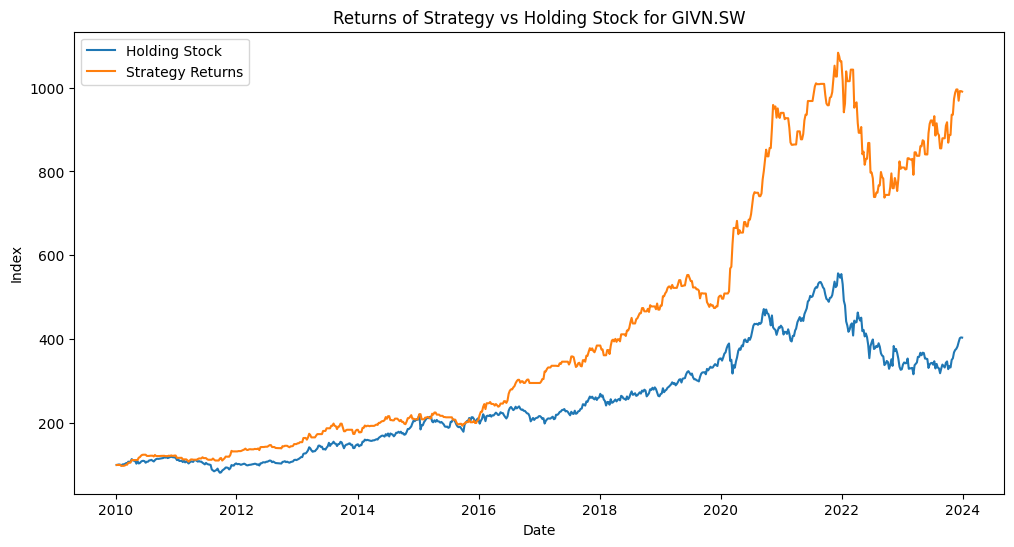

In [77]:
plot_strategy_returns(df, "GIVN.SW")    